In [1]:
from koopman_probabilistic import *
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

In [9]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
x = np.transpose(np.array([all_data["ISONE CA"]["DEMAND"], all_data["ISONE CA"]["DewPnt"], all_data["ISONE CA"]["DryBulb"]], dtype=np.float32))

In [10]:
mean = np.mean(x, axis=0)
rnge = np.max(x, axis=0) - np.min(x, axis=0)
x = (x - np.matlib.repmat(mean, x.shape[0], 1)) / np.matlib.repmat(rnge, x.shape[0], 1)

In [11]:
data_name = "GEFCom2017_isone_temp"

predict_through = x.shape[0] // 10
train_through = 1 * 365 * 24
xt = x[:train_through, :]

num_mu = 4
num_sig = 4
num_fourier = 3
mu_file = "forecasts//" + data_name + f"_{num_mu}mu.npy"
sigma_file = "forecasts//" + data_name + f"_{num_sig}sigma.npy"

In [12]:
model = FullyConnectedNLL(x_dim=xt.shape[1], num_freqs_mu=num_mu, num_freqs_sigma=num_sig, n=512)
k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier)
k.find_fourier_omegas(xt, hard_code=[24, 168, 365.24])

tensor([0.2618, 0.0374, 0.0172])

In [13]:
k.fit(xt, iterations=50, interval=10, verbose=True, cutoff=1, weight_decay=0.0001)
mu_hat, sigma_hat = k.predict(predict_through)
np.save(mu_file, mu_hat)
np.save(sigma_file, sigma_hat)

Setting 3 to 2.000052322774439
Setting 7 to 36563.30434782609
Iteration  0
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04], grad_fn=<MulBackward0>)
Loss:  -0.3201353
Iteration  1
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04], grad_fn=<MulBackward0>)
Loss:  -0.32013533
Iteration  2
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04], grad_fn=<MulBackward0>)
Loss:  -0.32013535
Iteration  3
tensor([2.4000e+01, 1.6

Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04], grad_fn=<MulBackward0>)
Loss:  -1.6844616
Iteration  28
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04], grad_fn=<MulBackward0>)
Loss:  -1.6749339
Iteration  29
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04], grad_fn=<MulBackward0>)
Loss:  -1.6660343
Iteration  30
tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02,
        3.6524e+02, 3.6563e+04])
Setting periods to tensor([2.4000e+01, 1.6800e+02, 3.6524e+02, 2.0001e+00, 2.4000e+01, 1.6800e+02

<IPython.core.display.Javascript object>


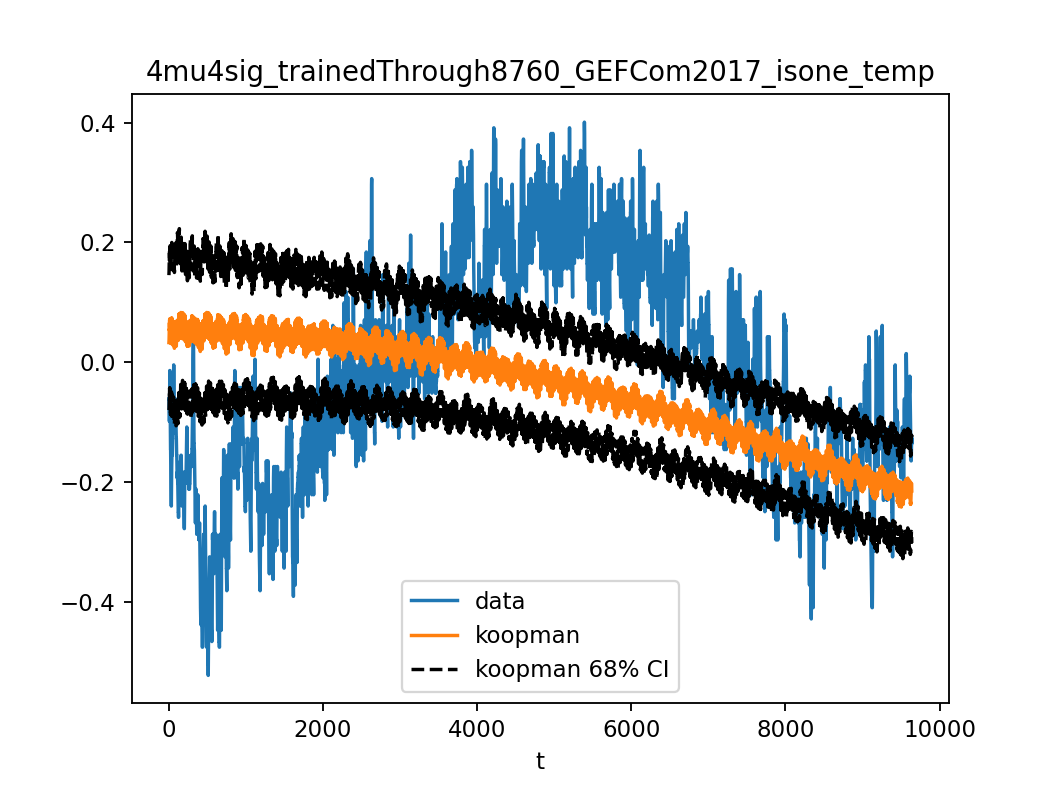

In [17]:
# print("SEED:", seed)
%matplotlib notebook
# slc = -2400
dim = 2
# plt.scatter(np.arange(-slc), x[slc:], label="data")
plt.plot(x[:predict_through, dim], label="data")
plt.plot(mu_hat[:, dim], label="koopman")
plt.plot(mu_hat[:, dim] + sigma_hat[:, dim], "--", color="black", label="koopman 68% CI")
plt.plot(mu_hat[:, dim] - sigma_hat[:, dim], "--", color="black")

# plt.plot(mu_vec[slc:], label="real mu")
# plt.plot(mu_hat[slc:, 0], label="koopman mu")
# plt.legend()
# plt.show()
#
# plt.plot(sigma_vec[slc:], label="real sigma")
# plt.plot(sigma_hat, label="koopman sigma")
plt.title(f"{num_mu}mu{num_sig}sig_trainedThrough{train_through}_" + data_name)
plt.xlabel("t")
plt.legend()
plt.show()

In [15]:
mu_hat.shape

(9640, 3)

In [7]:
type(xt)

numpy.ndarray

In [ ]:
plt.figure()
plt.plot(mu_vec, label="real $\mu$")
plt.plot(mu_hat[:, 0], "--", label="koopman $\mu$")
plt.xlabel("t")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


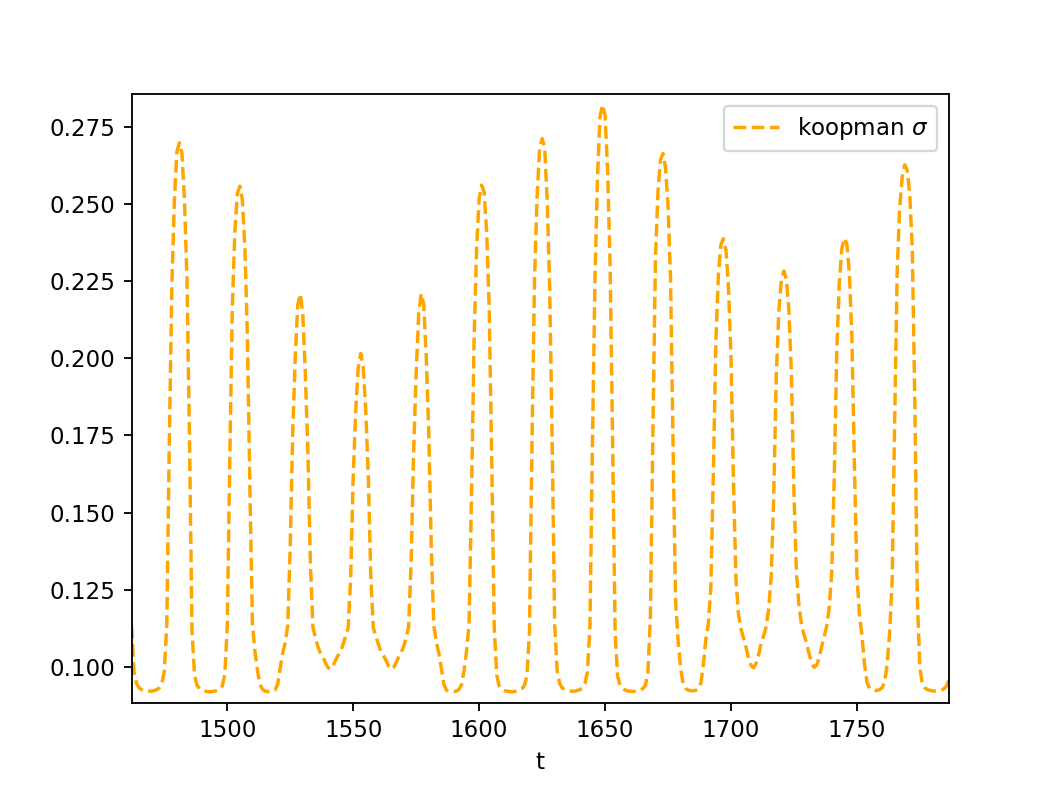

In [13]:
plt.figure()
# plt.plot(sigma_vec, color="blue", label="real $\sigma$")
plt.plot(sigma_hat[:, 0], "--", color="orange", label="koopman $\sigma$")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
# Construct pdf quantiles
# REMOVE
sigma = 1 * np.cos(2 * np.pi / 36 * np.arange(5000) + 1.5) + 4

num_quantiles = 100
domain = [min(mu_hat[:,0] - 2.5*sigma), max(mu_hat[:,0] + 2.5*sigma)]
x_axis = np.linspace(domain[0], domain[1], num_quantiles)

In [ ]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
verts = []
ts = range(4970, 5000, 2)
for t in ts:
    z = normal_pdf(mu_hat[t], sigma[t], x_axis)
    plt.plot(x_axis, t*np.ones(num_quantiles), z)
    verts.append(polygon_under_graph(x_axis, z))

plt.plot(mu_hat[4970:5000:2, 0], ts, np.zeros(len(ts)))

# poly = PolyCollection(verts, facecolors=['r', 'g', 'b', 'y'], alpha=.6)
# ax.add_collection3d(poly, zs=ts, zdir='y')
plt.xlabel("x")
plt.ylabel("t")
ax.set_zlabel("probability density")


plt.show()

In [6]:
help(np.concatenate)

Help on function concatenate in module numpy:

concatenate(...)
    concatenate((a1, a2, ...), axis=0, out=None)
    
    Join a sequence of arrays along an existing axis.
    
    Parameters
    ----------
    a1, a2, ... : sequence of array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        The axis along which the arrays will be joined.  If axis is None,
        arrays are flattened before use.  Default is 0.
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what concatenate would have returned if no
        out argument were specified.
    
    Returns
    -------
    res : ndarray
        The concatenated array.
    
    See Also
    --------
    ma.concatenate : Concatenate function that preserves input masks.
    array_split : Split an array into multiple sub-arrays of equal or
   